In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
path = r'C:\Users\godsw\Desktop\Study\Data Science\IBM\clean_df.csv'

In [13]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495,11.190476,8.703704,Low,0,1
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500,11.190476,8.703704,Low,0,1
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500,12.368421,9.038462,Medium,0,1
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950,9.791667,7.833333,Low,0,1
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450,13.055556,10.681818,Low,0,1


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#create linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
X = df[['highway-mpg']]
Y = df[['price']]

#fit the linear model using 'highway-mpg'
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#Create Prediction
Yhat = lm.predict(X)

In [18]:
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [19]:
#value of intercept (a)
lm.intercept_

array([38423.30585816])

In [20]:
#value of slope (b)
lm.coef_

array([[-821.73337832]])

In [21]:
#Create new Linear Regression object
pred = LinearRegression()
pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Linear regression for Engine-size and price
X1 = df[['engine-size']]
Y1 = df[['price']]
pred.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
pred.coef_

array([[166.86001569]])

In [24]:
pred.intercept_

array([-7963.33890628])

In [27]:
Y1hat = pred.predict(X)
Y1hat[0:5]

array([[-3458.11848261],
       [-3458.11848261],
       [-3624.9784983 ],
       [-2957.53843554],
       [-4292.41856107]])

In [30]:
Z = df[['highway-mpg','horsepower','curb-weight','engine-size']]
Y2 = df[['price']]

In [31]:
lm.fit(Z,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lm.intercept_

array([-15811.86376773])

In [35]:
lm.coef_

array([[36.1593925 , 53.53022809,  4.70805253, 81.51280006]])

In [36]:
#price = -15811.86376773 + 36.1593925 X 'highway-mpg' + 53.53022809 X 'horsepower' + 4.70805253 X 'curb-weight' + 81.51280006 X 'engine-size'

In [37]:
import seaborn as sns
%matplotlib inline

(0, 48184.27455676879)

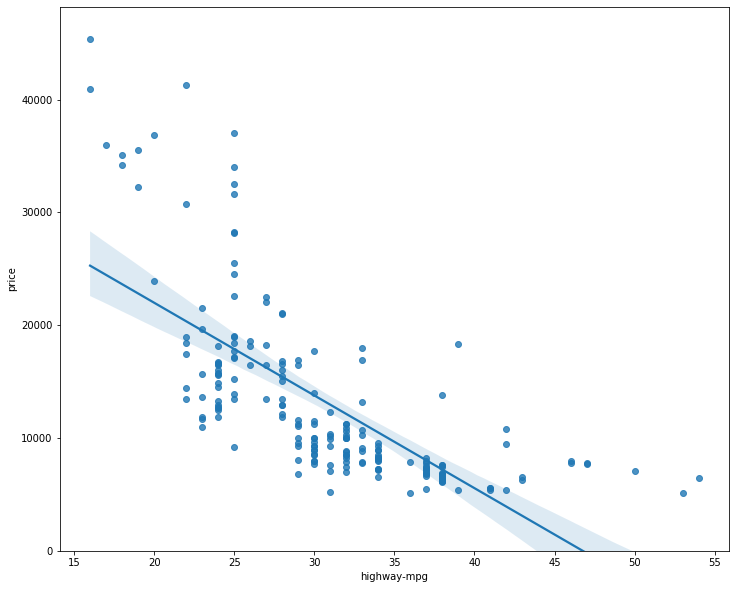

In [41]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y='price',data = df)
plt.ylim(0,)

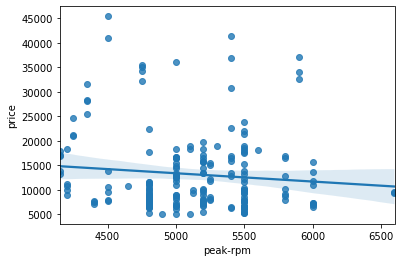

In [43]:
sns.regplot(x='peak-rpm',y='price', data = df)

In [44]:
#'highway-mpg' vs 'price' displays better replationship
#using .corr() to further highlight this
df[['highway-mpg','peak-rpm','price']].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


Using Residual Plots

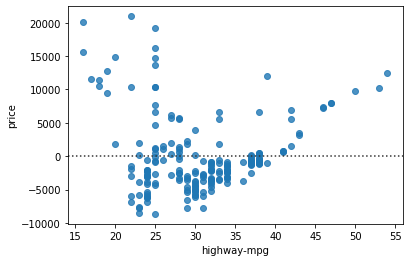

In [49]:
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

Using Pipelines

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler